연습문제 7.5.1

In [4]:
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭
sp.stats.pearsonr(x1, x2)[0]

-0.11756978413300204

In [6]:
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭
sp.stats.pearsonr(x3, x4)[0]

0.962865431402796

In [7]:
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭
sp.stats.pearsonr(x2, x4)[0]

-0.3661259325364391

In [9]:
rv = sp.stats.norm(loc=1, scale=2)

확률밀도함수

<function matplotlib.pyplot.show(*args, **kw)>

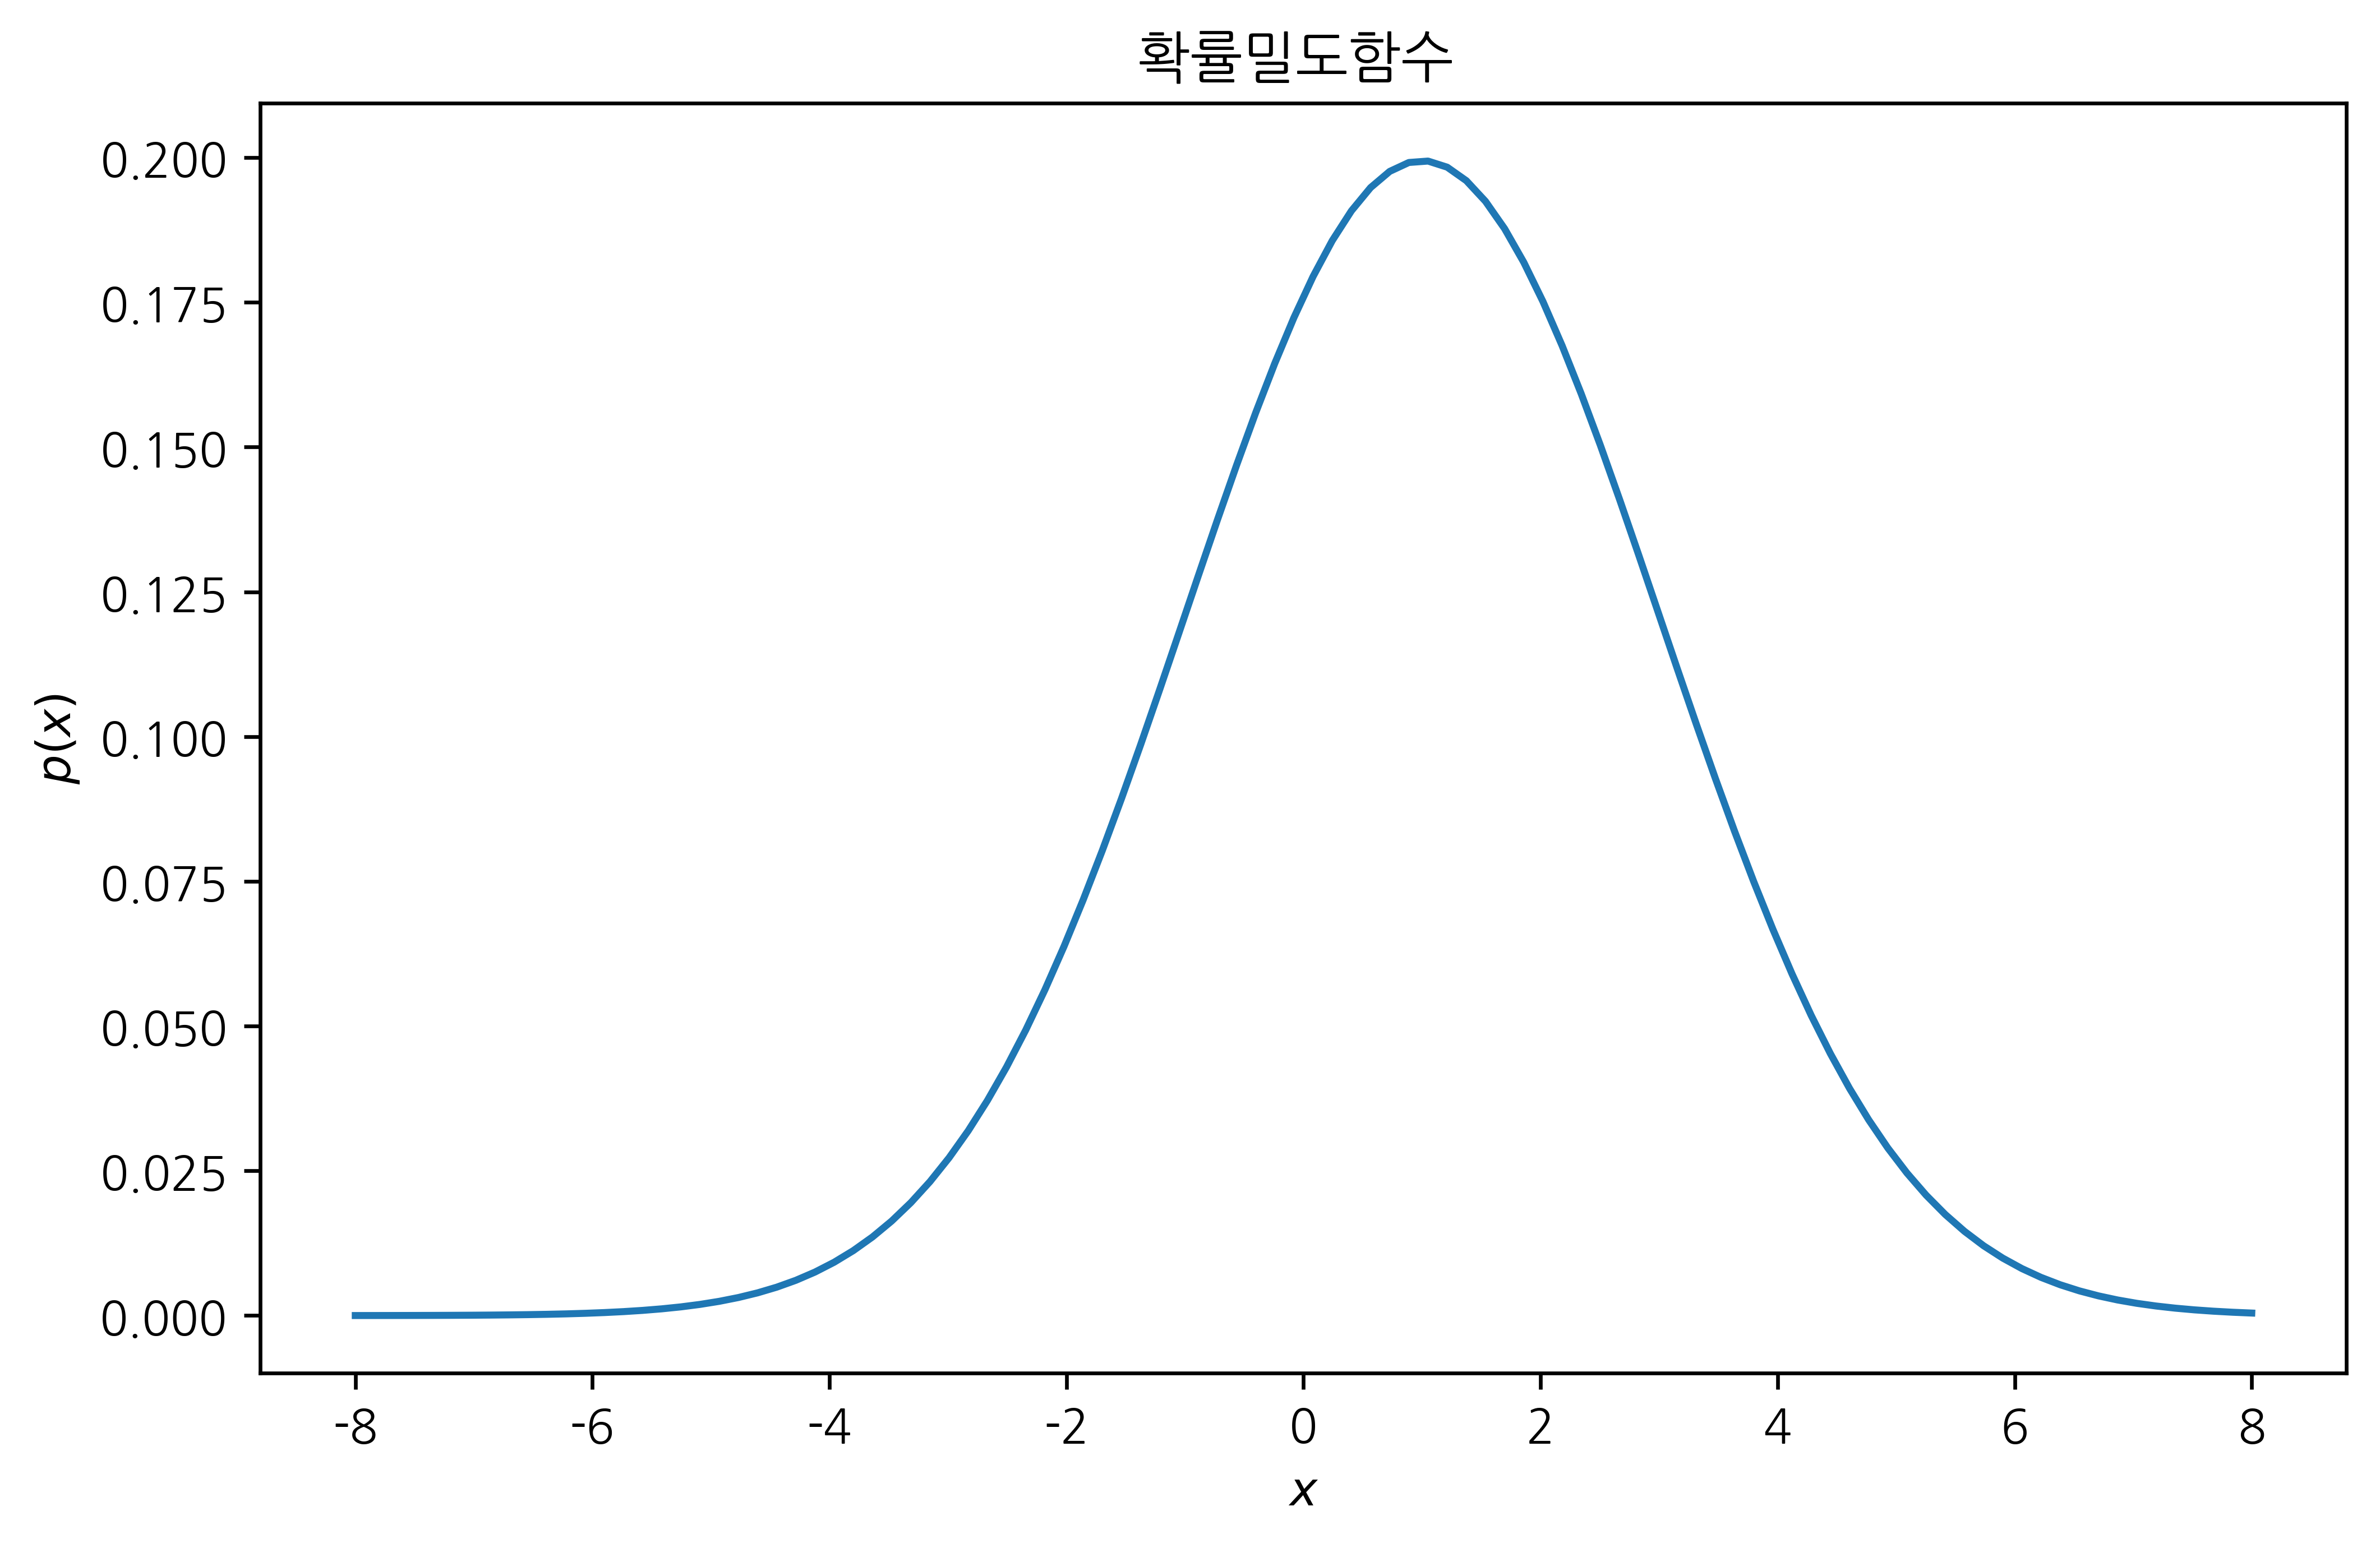

In [12]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show

연습문제 8.1.1

In [13]:
rv1 = sp.stats.norm(loc=0, scale=0.1 )

<function matplotlib.pyplot.show(*args, **kw)>

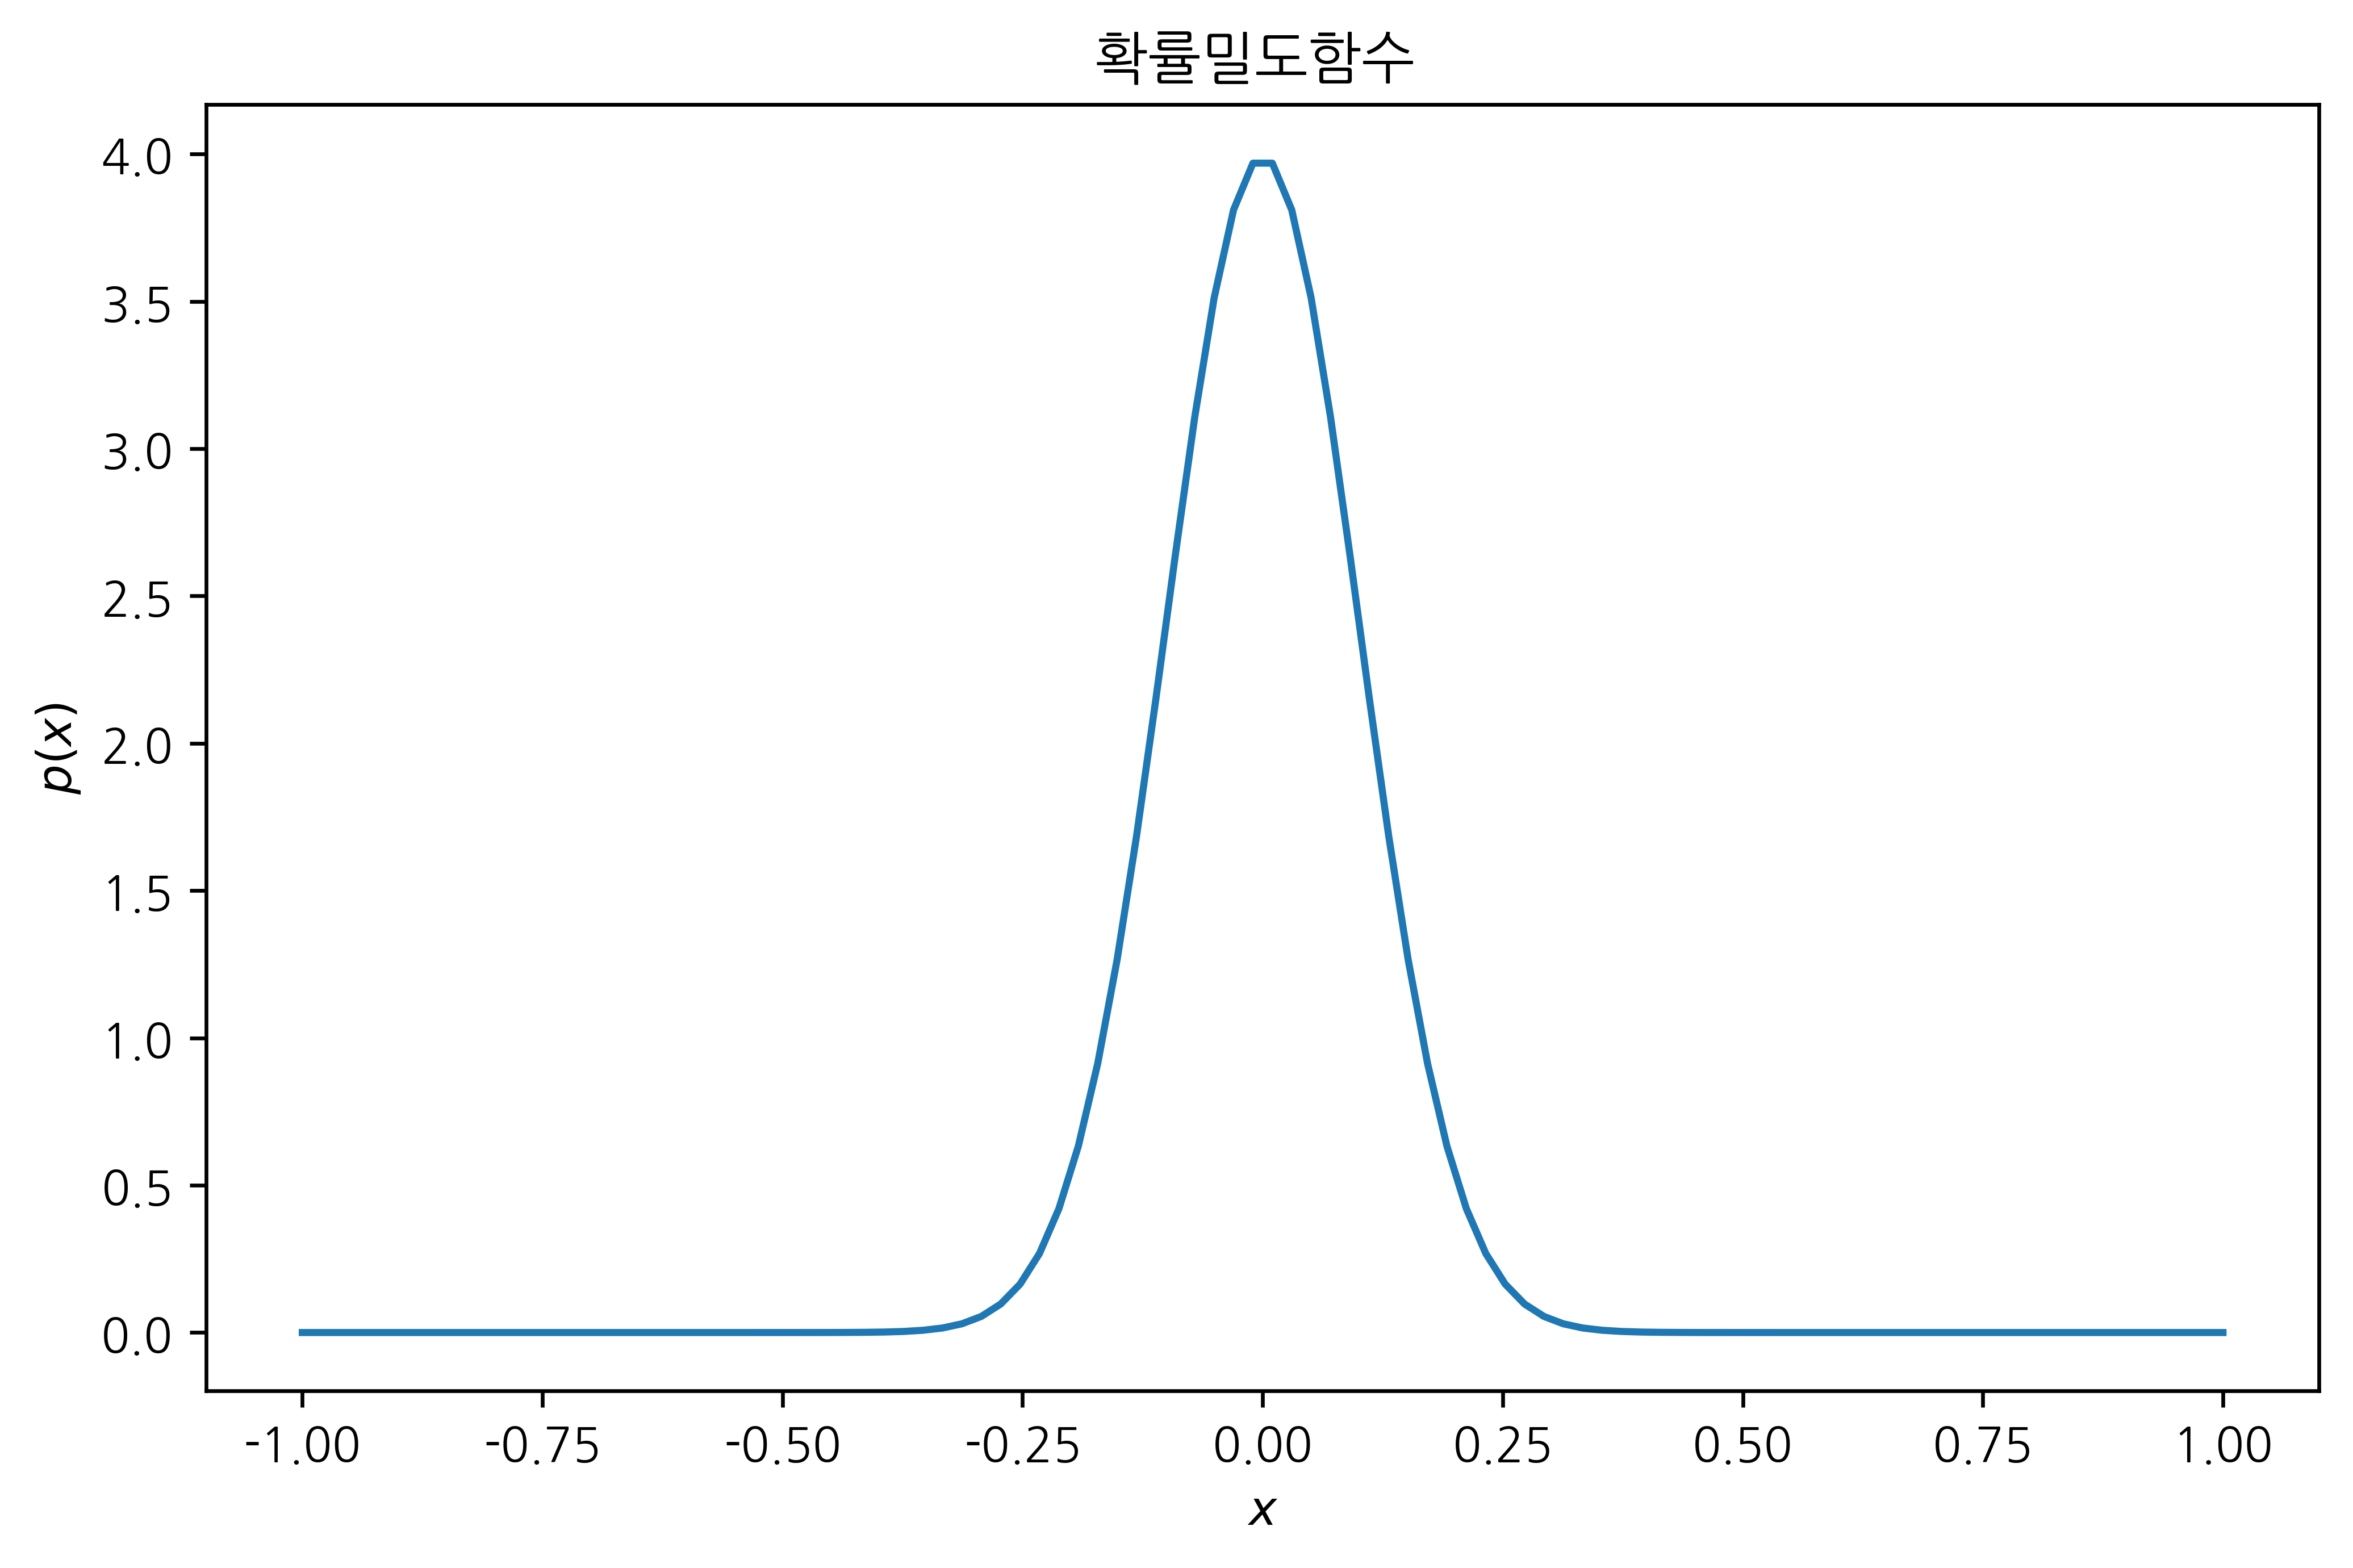

In [15]:
xx = np.linspace(-1, 1, 100)
pdf = rv1.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show

연습문제 8.1.3

<function matplotlib.pyplot.show(*args, **kw)>

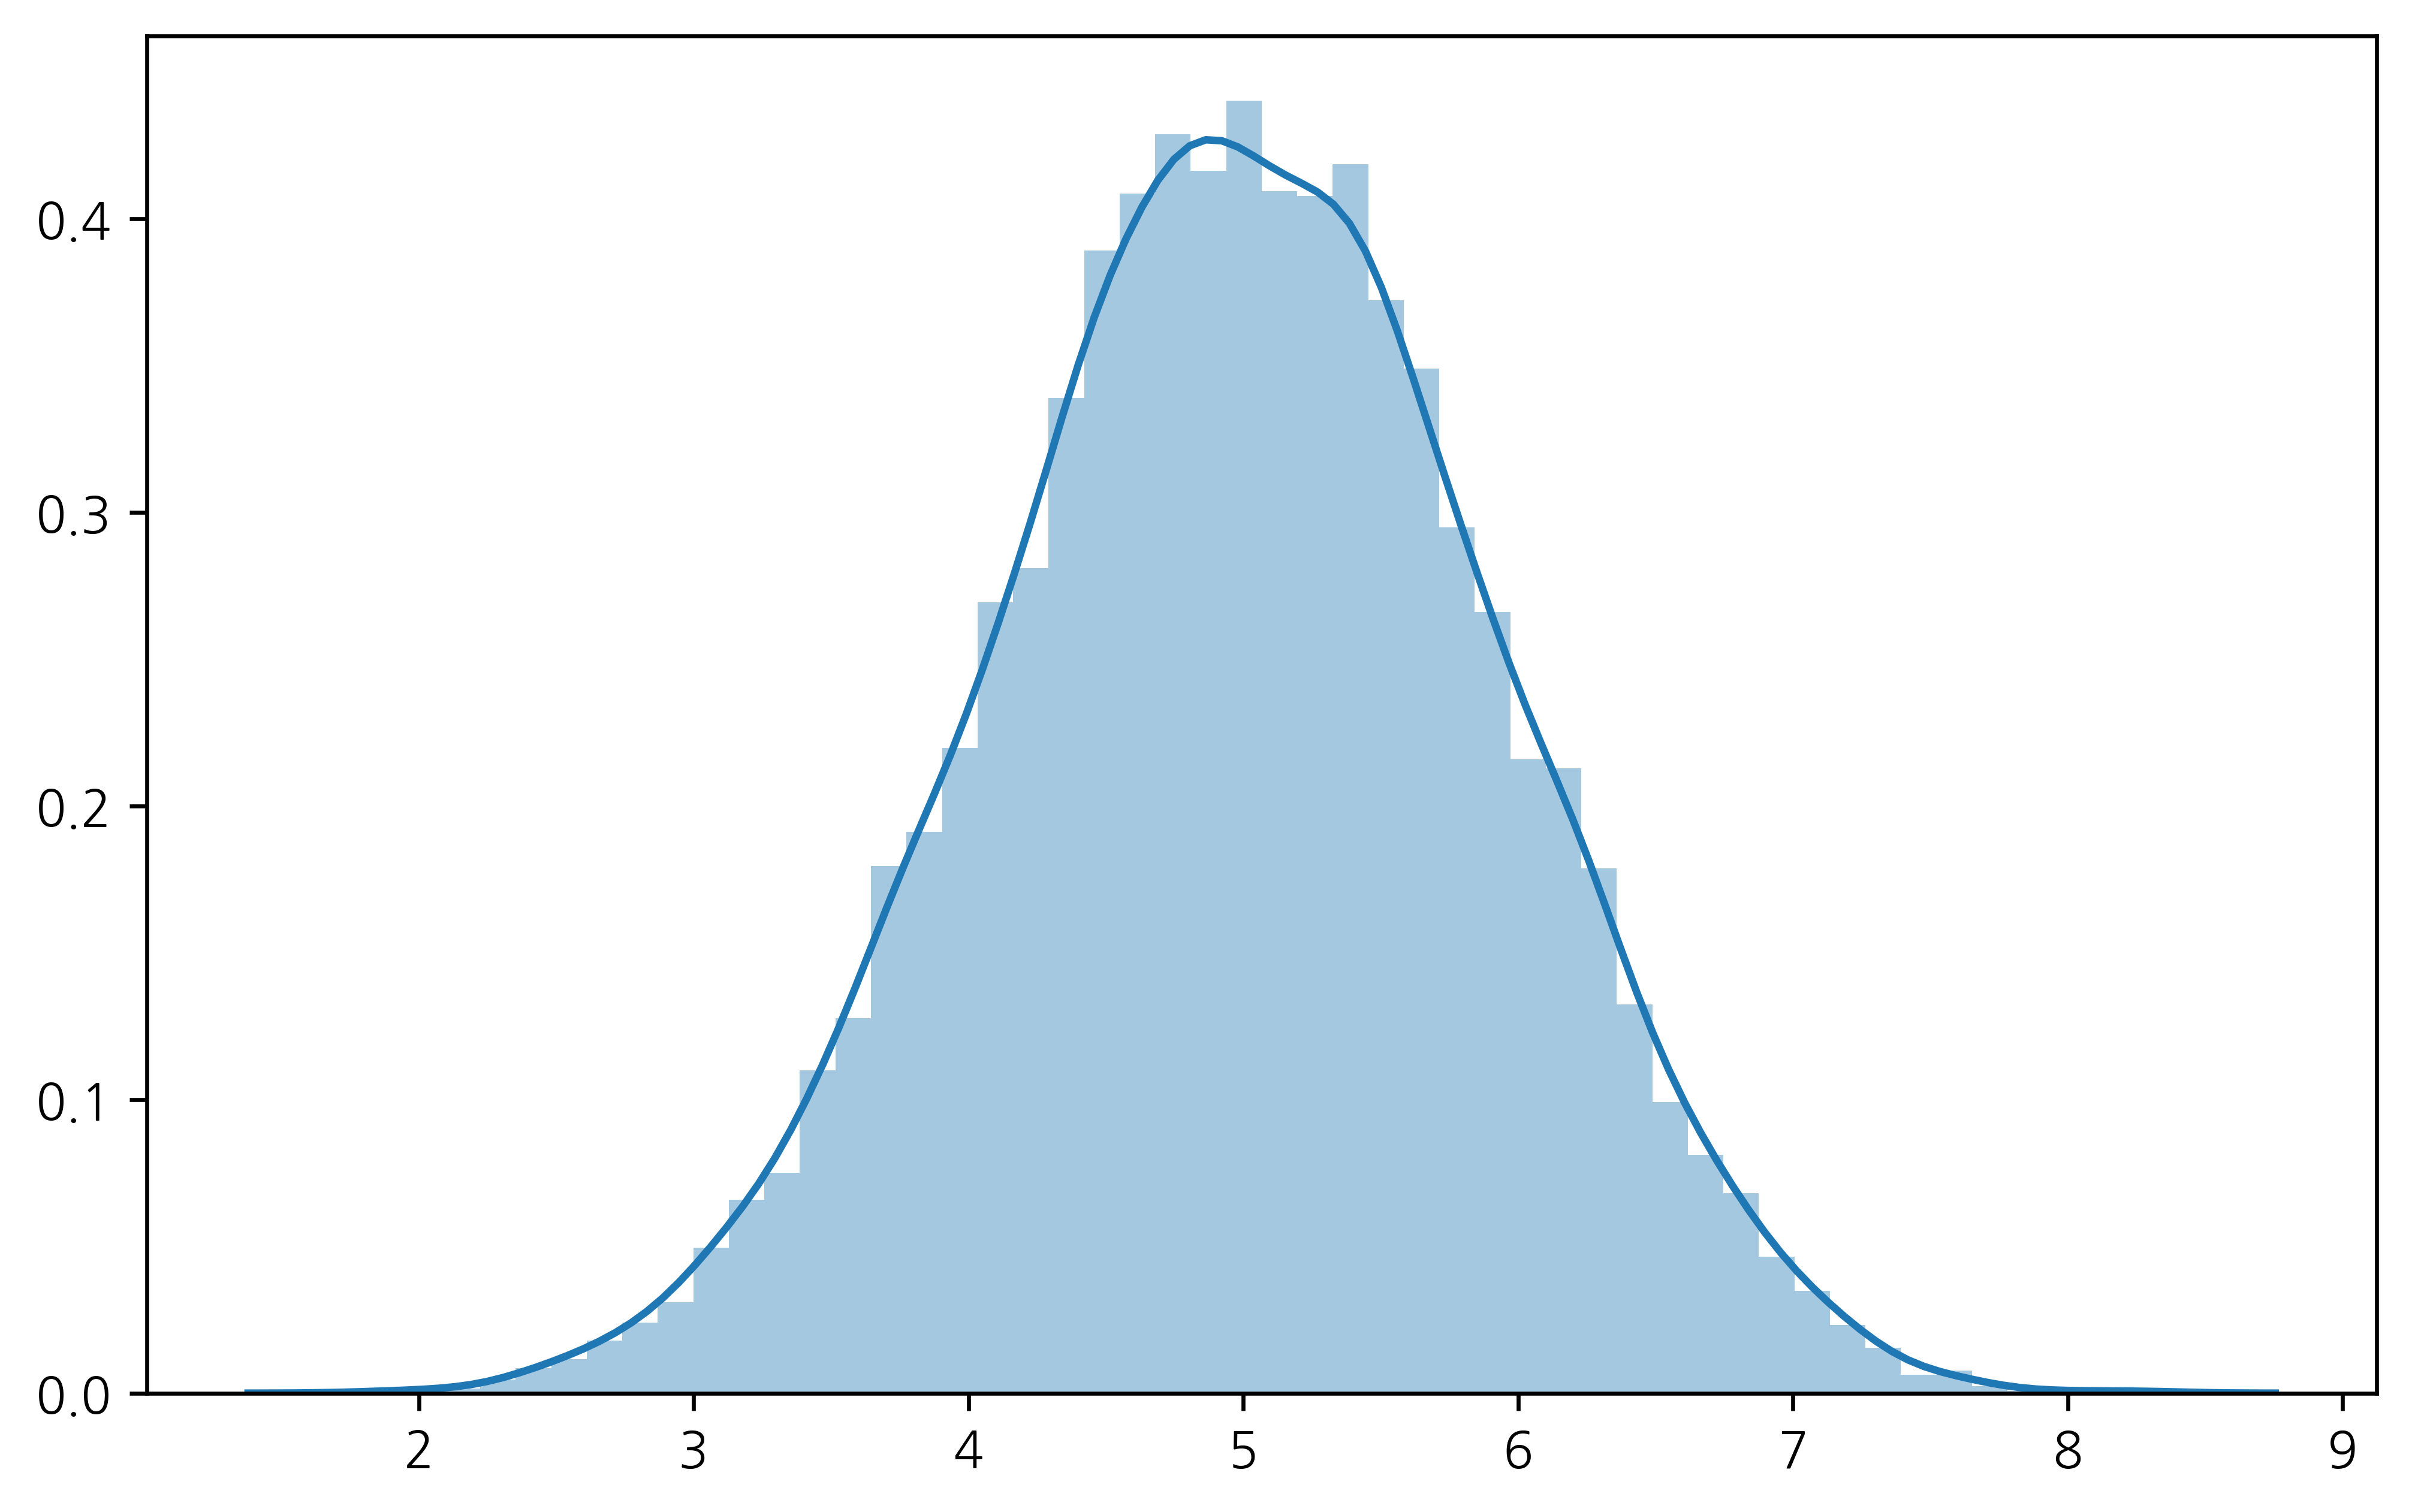

In [22]:
x = sp.stats.uniform().rvs((10, 10000))
s = x.sum(axis=0)
sns.distplot(s)
plt.show

베르누이 확률변수

In [24]:
mu = 0.6
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

<function matplotlib.pyplot.show(*args, **kw)>

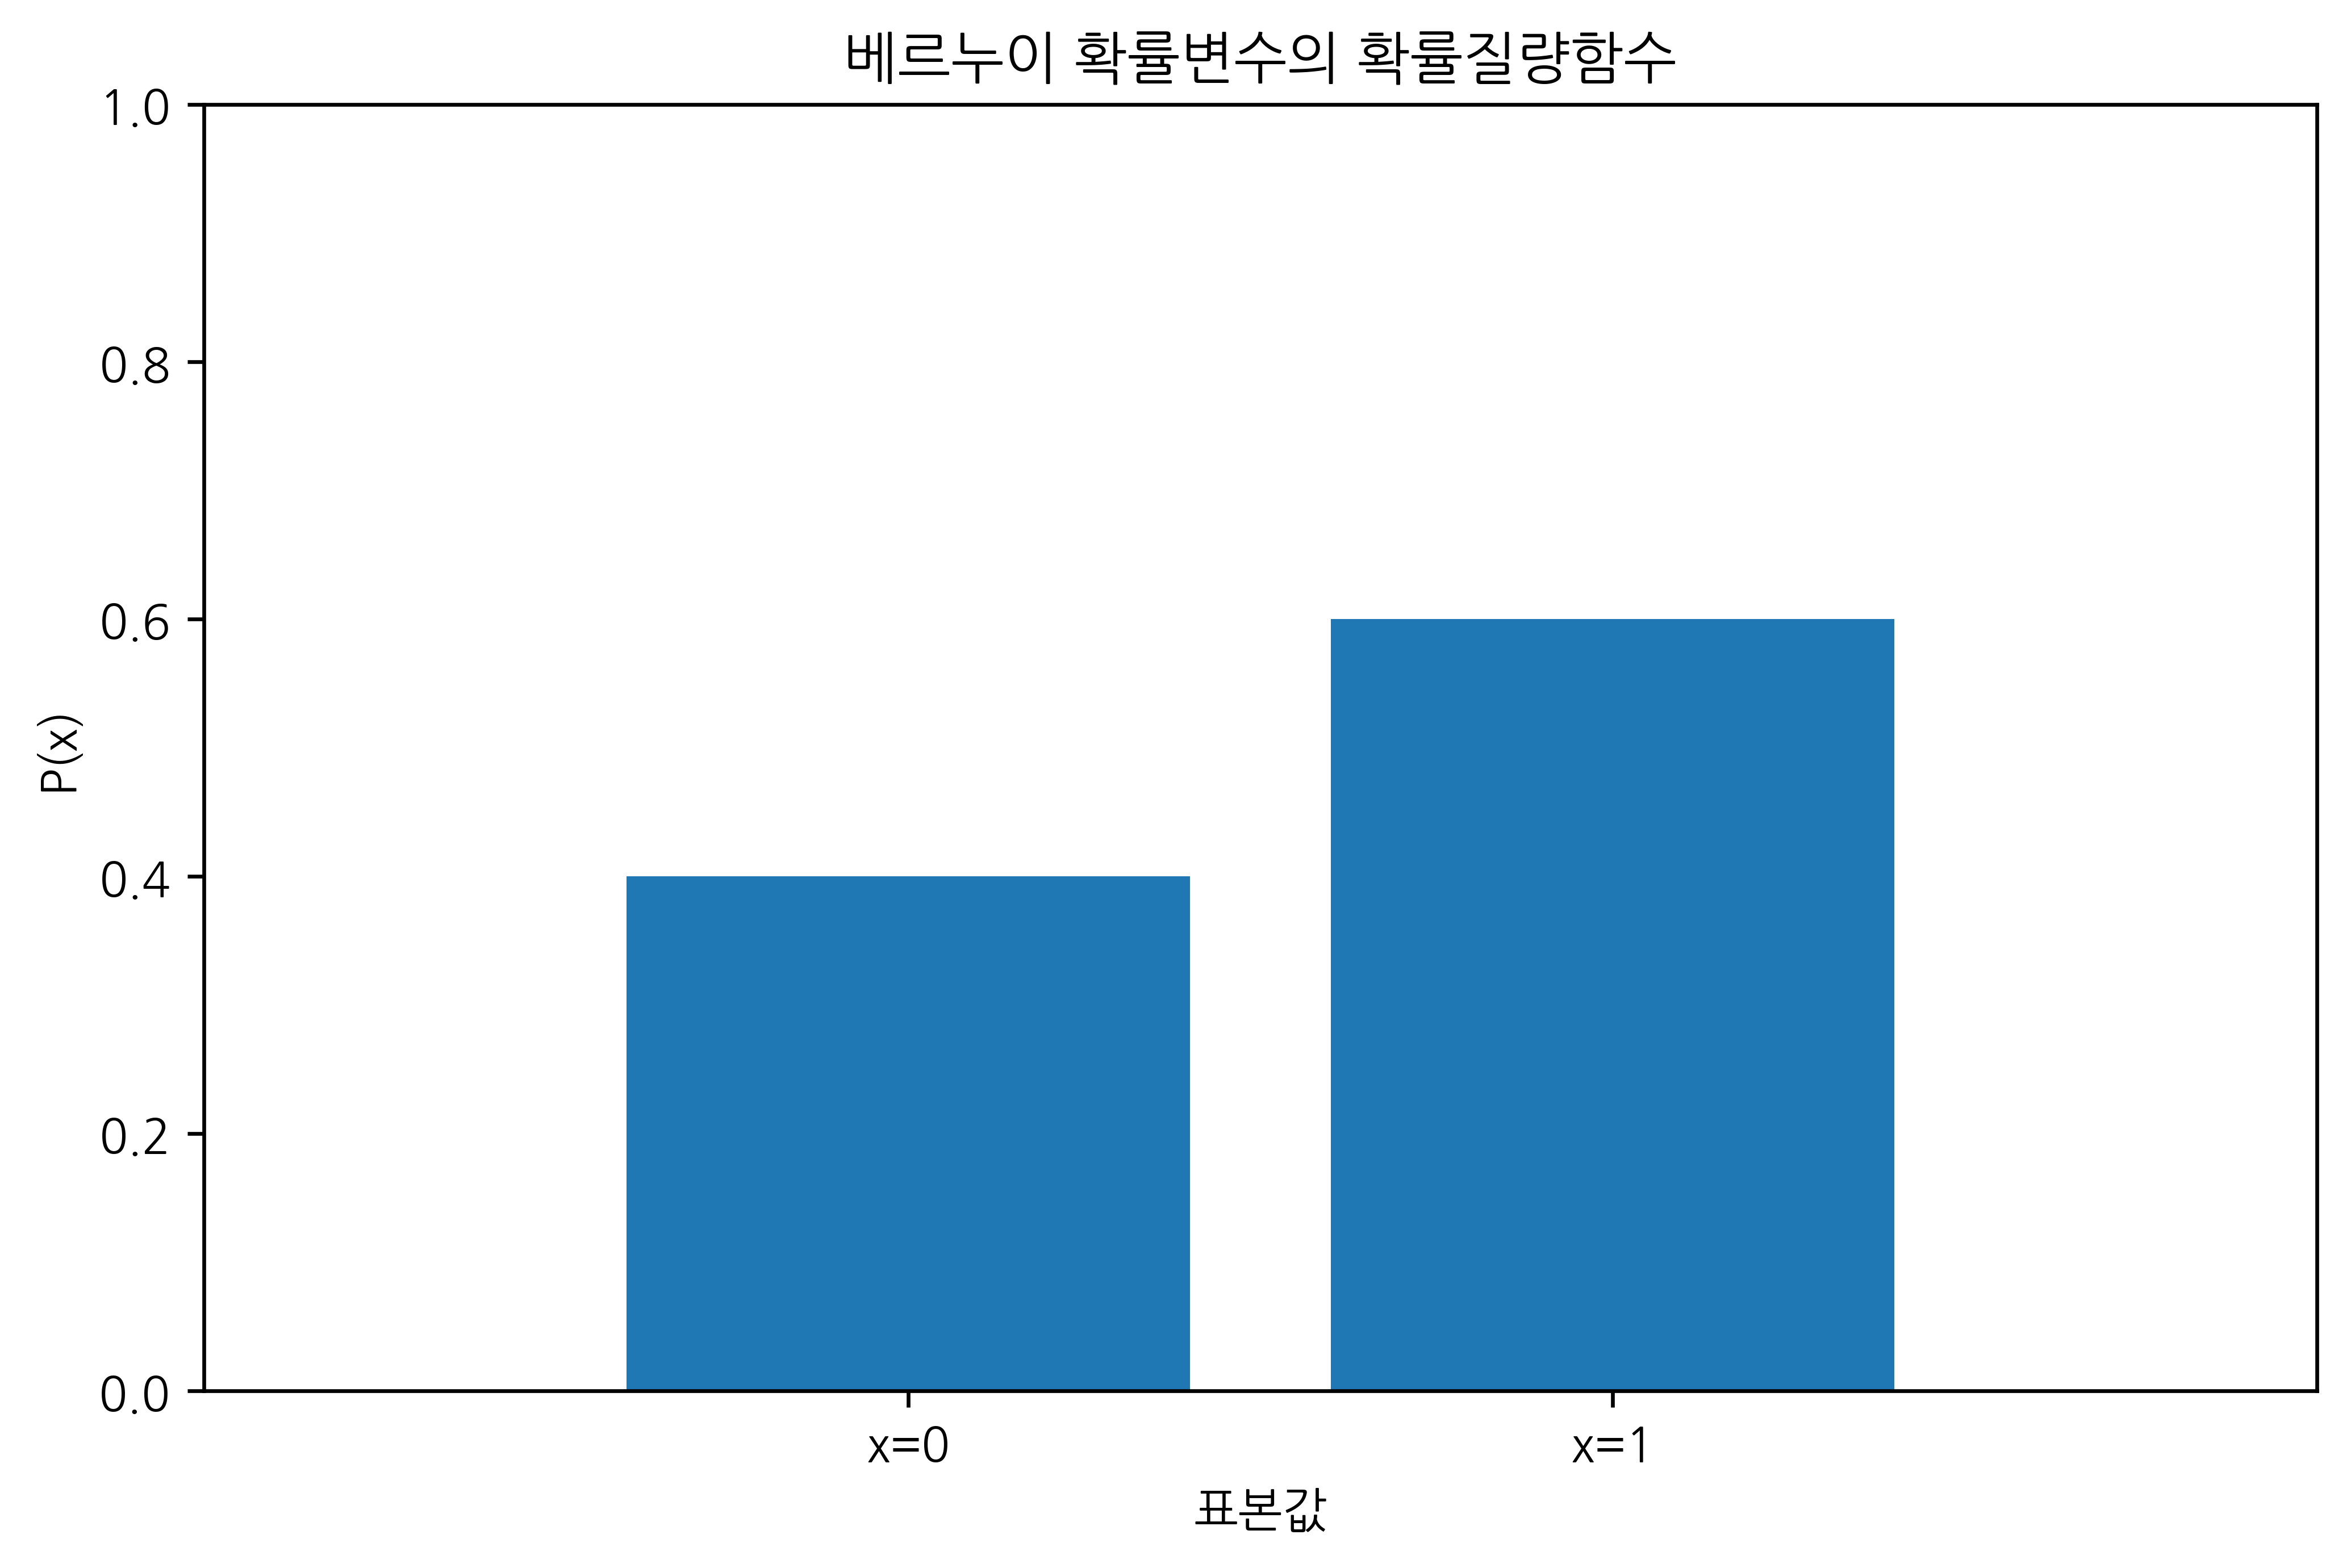

In [25]:
xx = [0,1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show

시뮬레이션

In [27]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

<function matplotlib.pyplot.show(*args, **kw)>

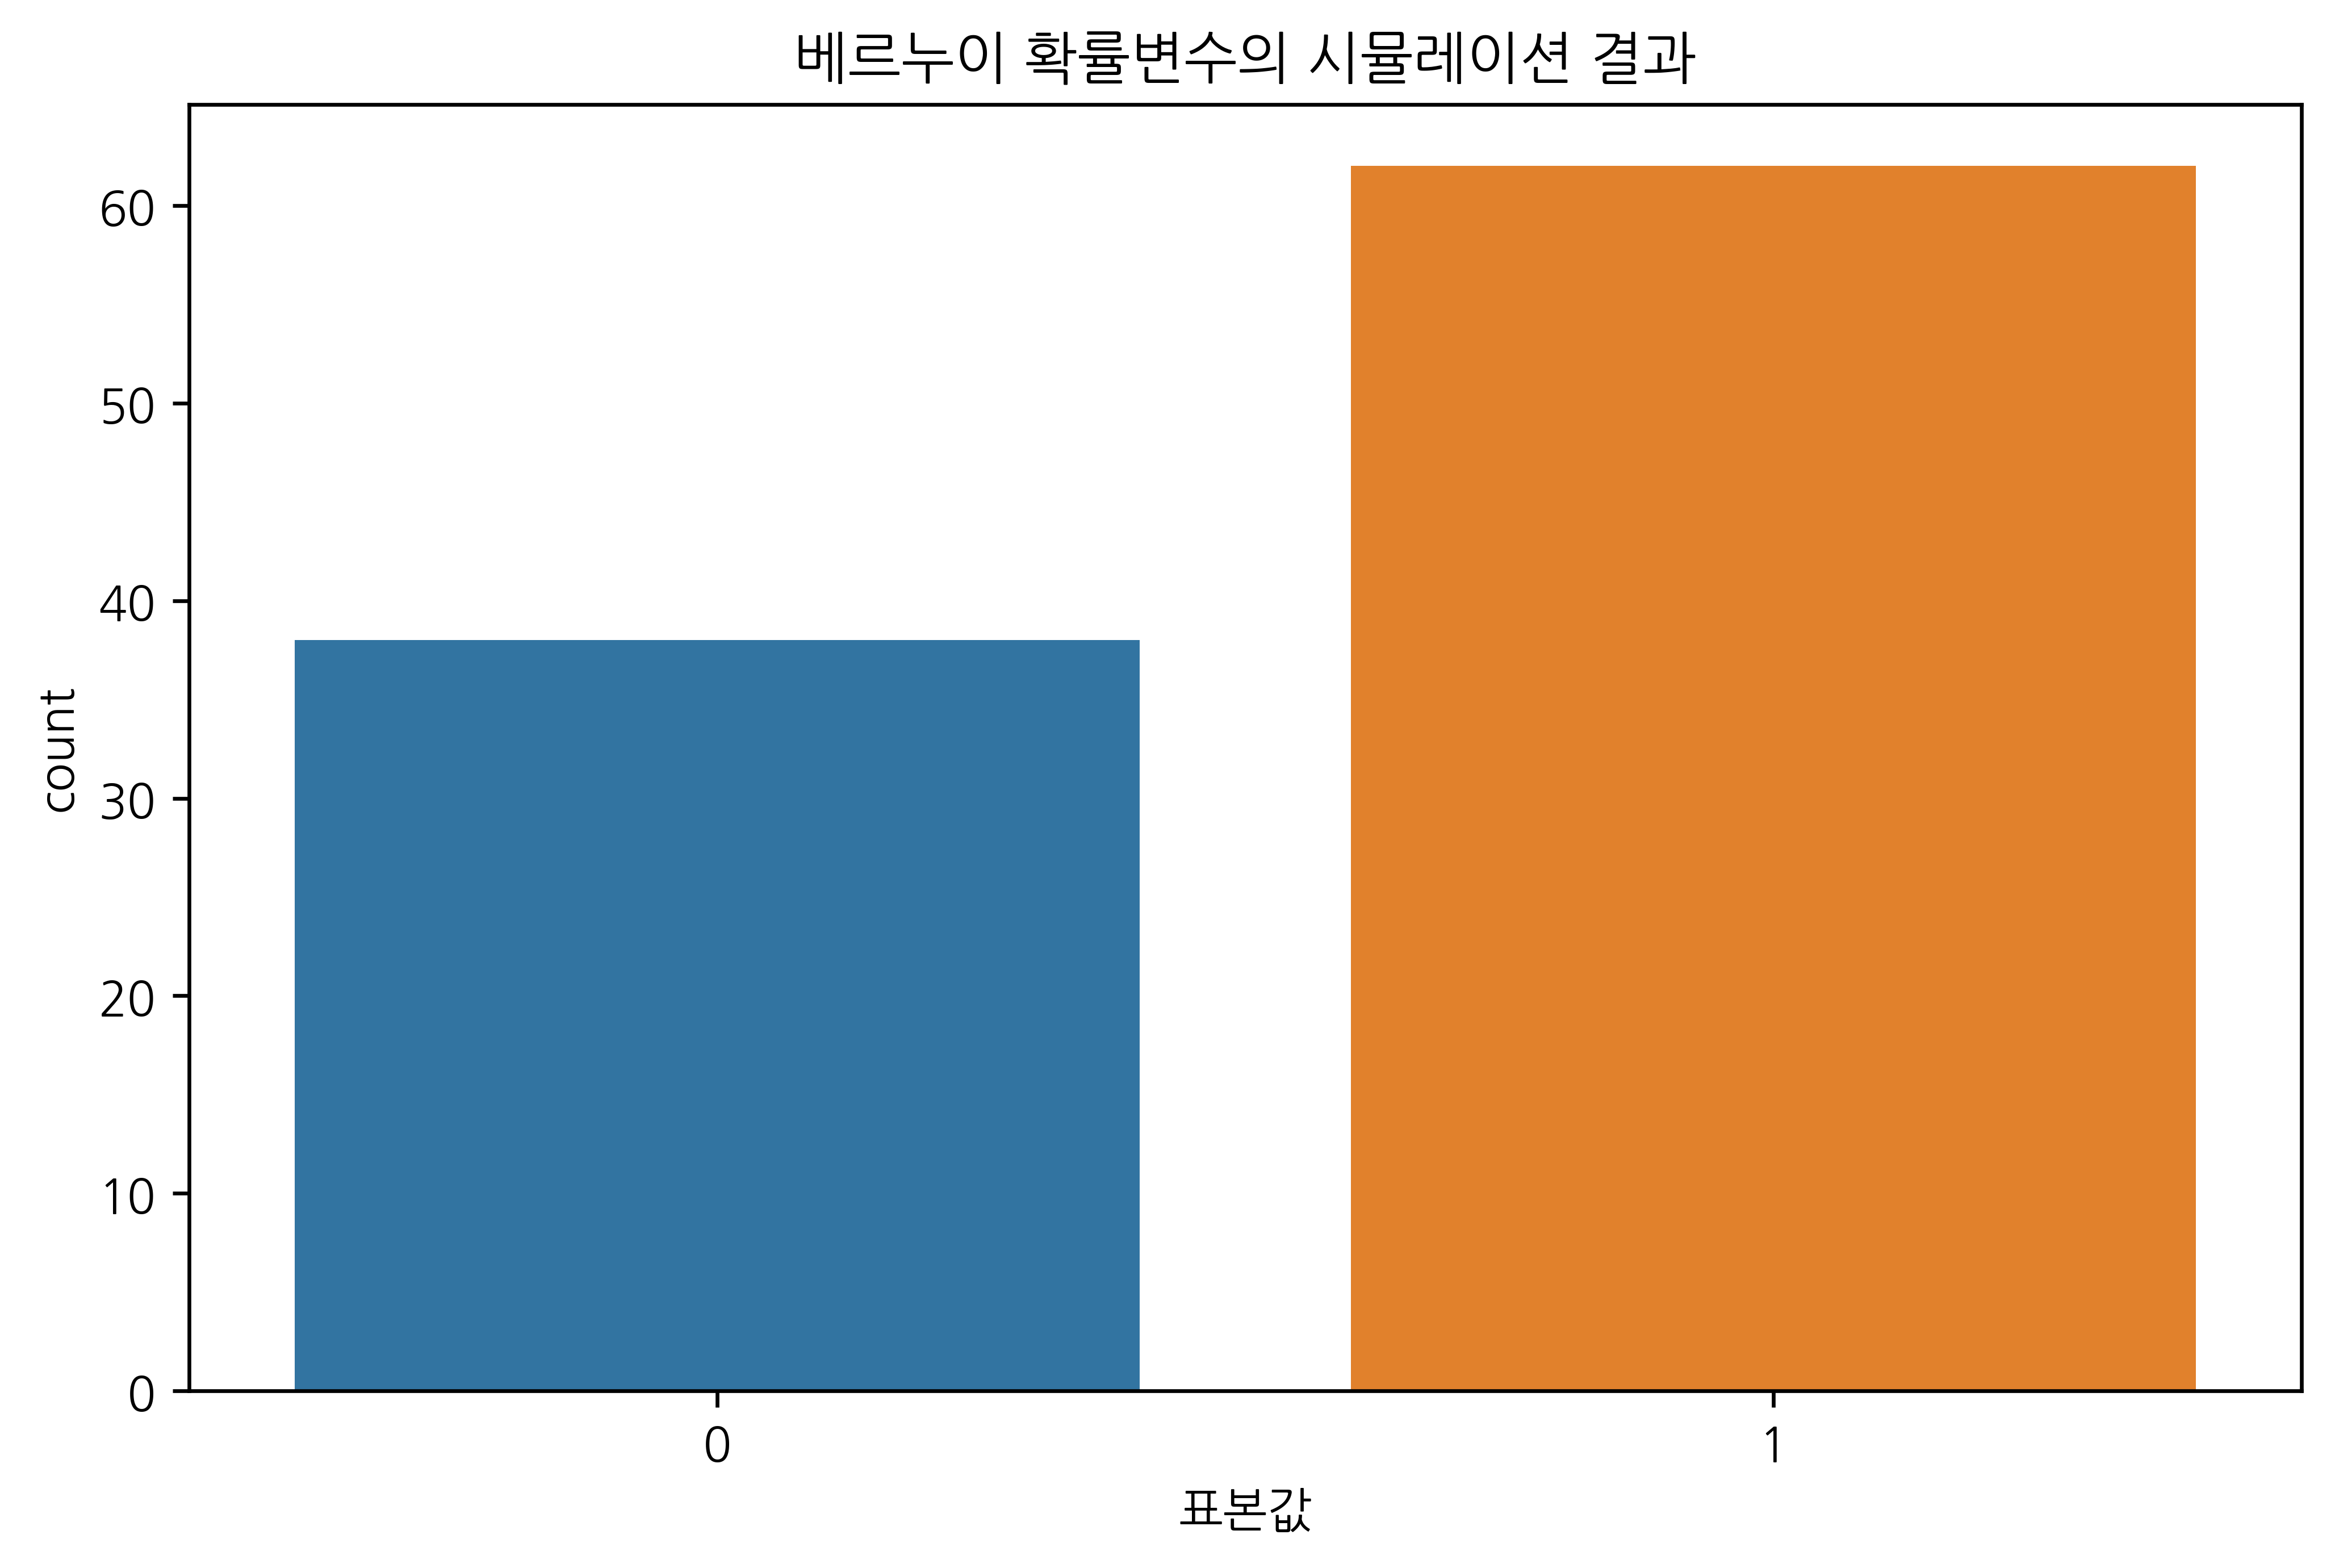

In [29]:
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show

In [38]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [40]:
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


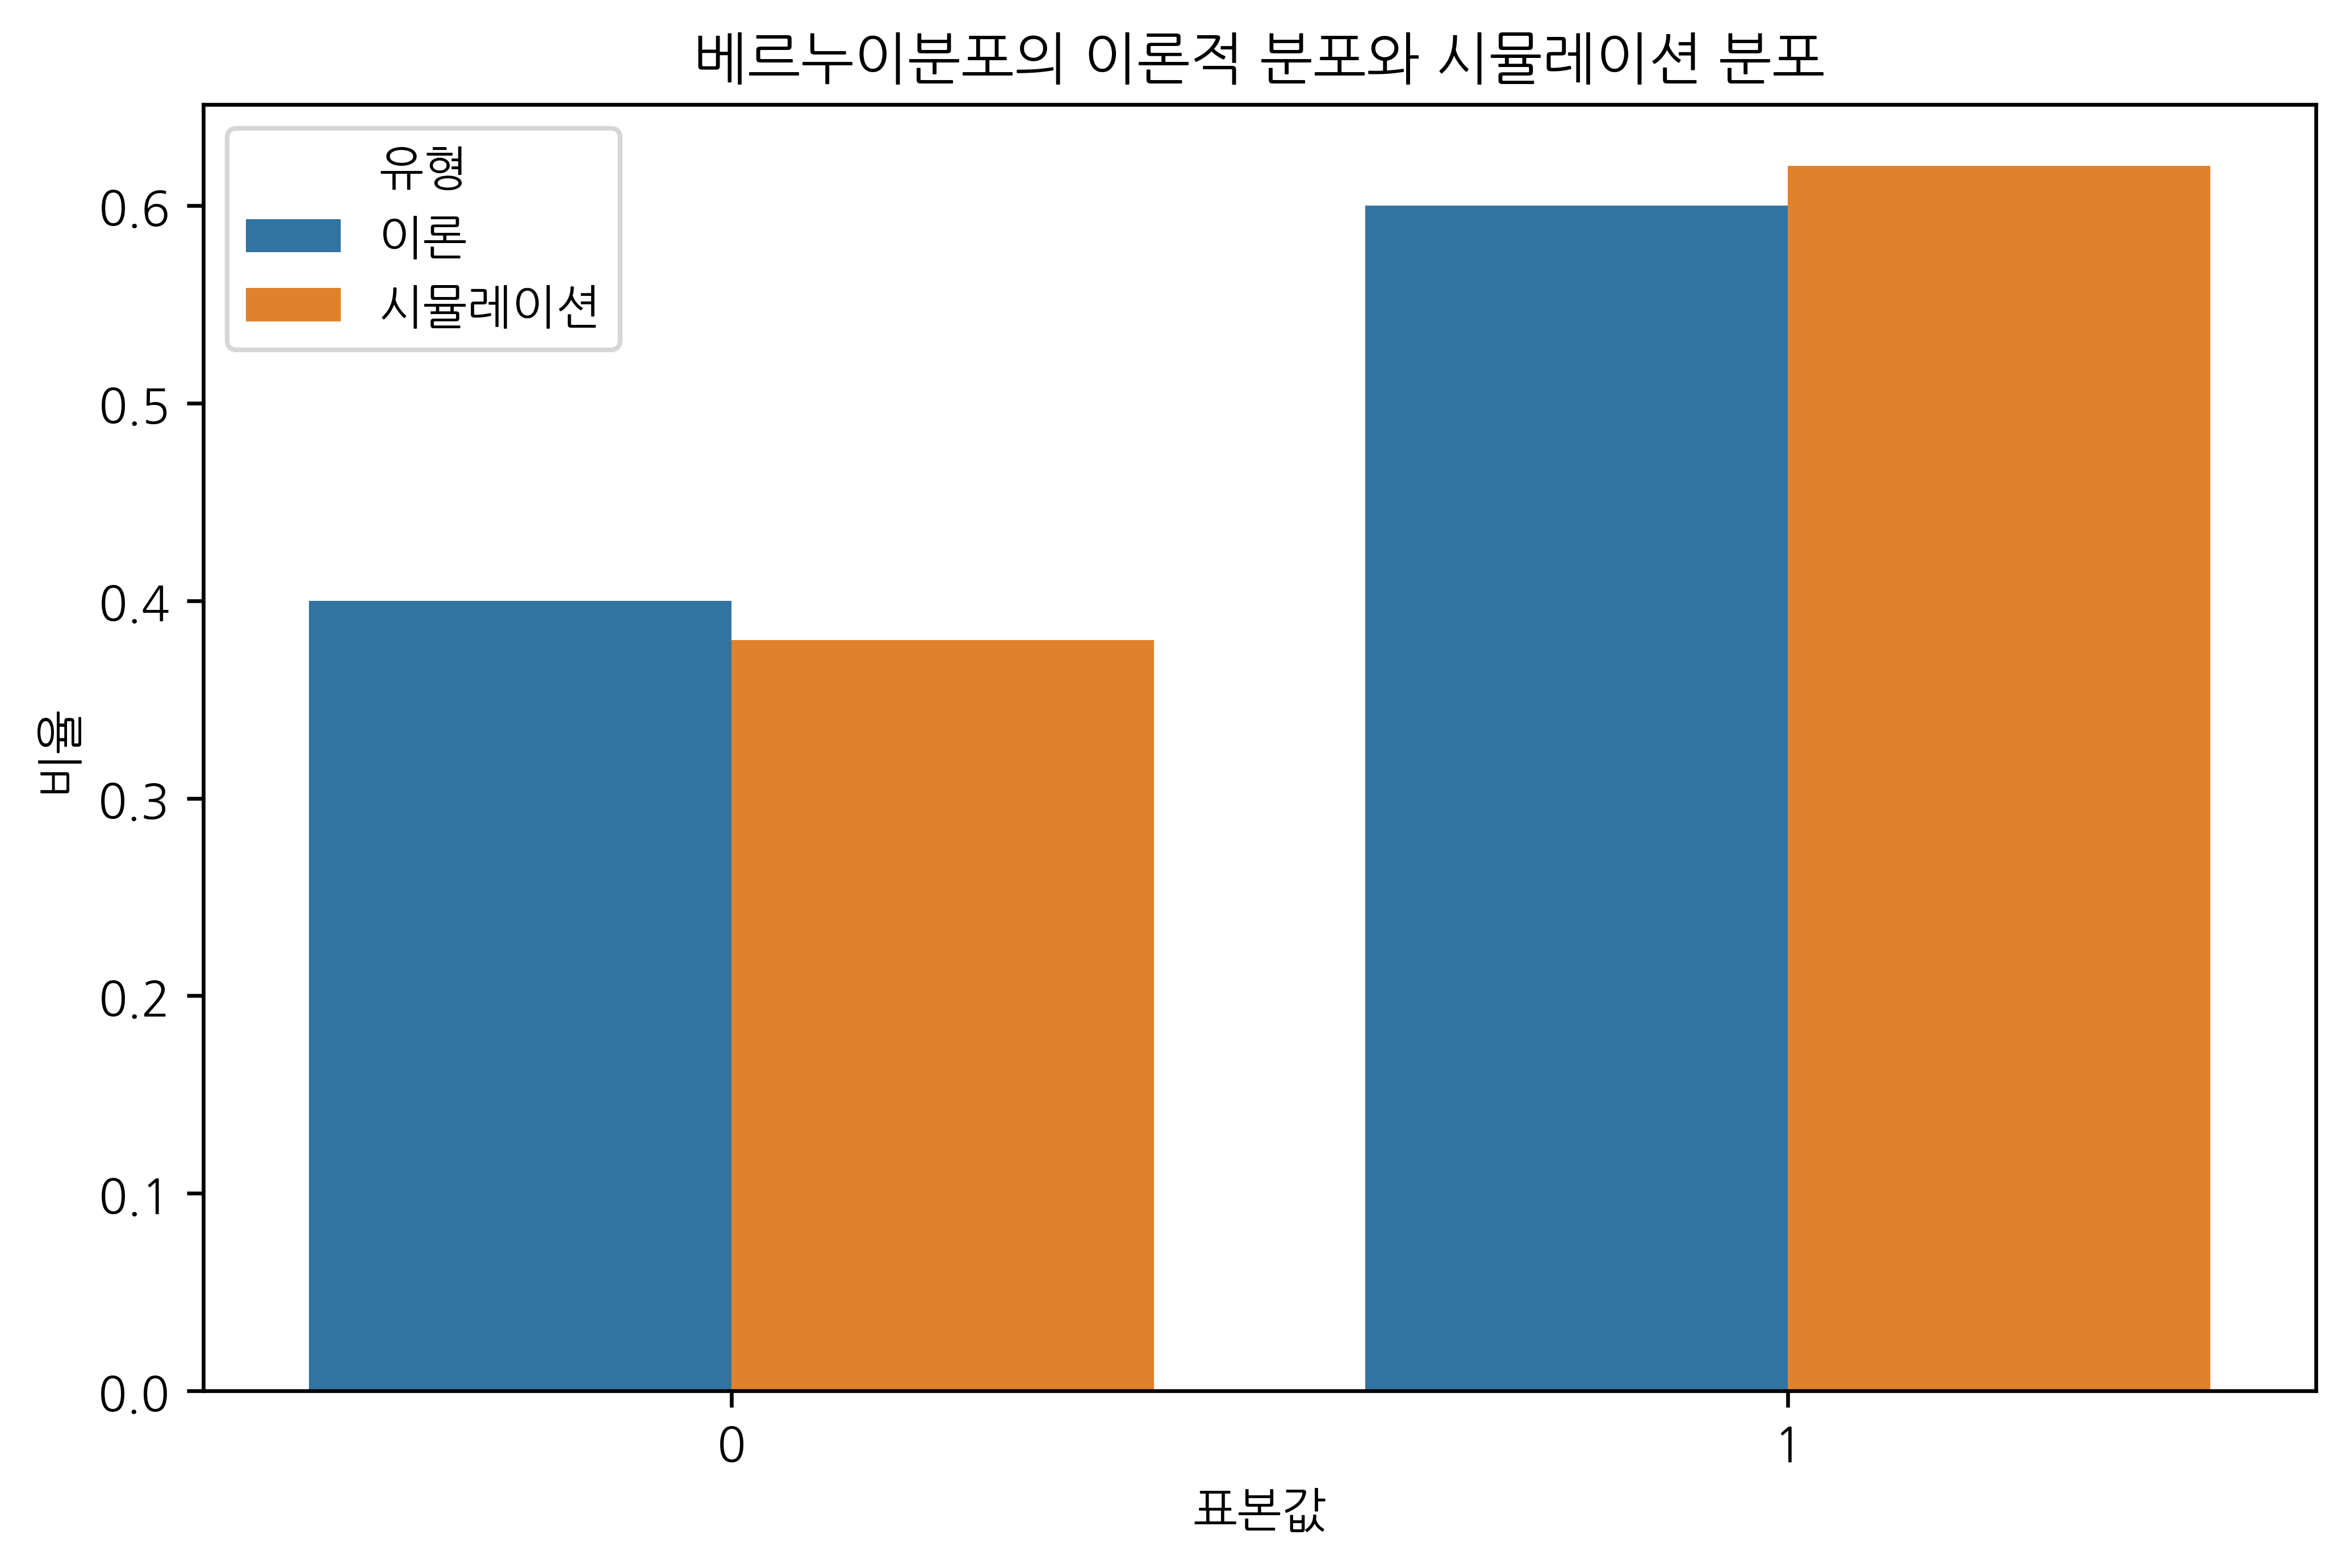

In [41]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

연습문제 8.2.2

In [42]:
mu1 = 0.5
rv1 = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

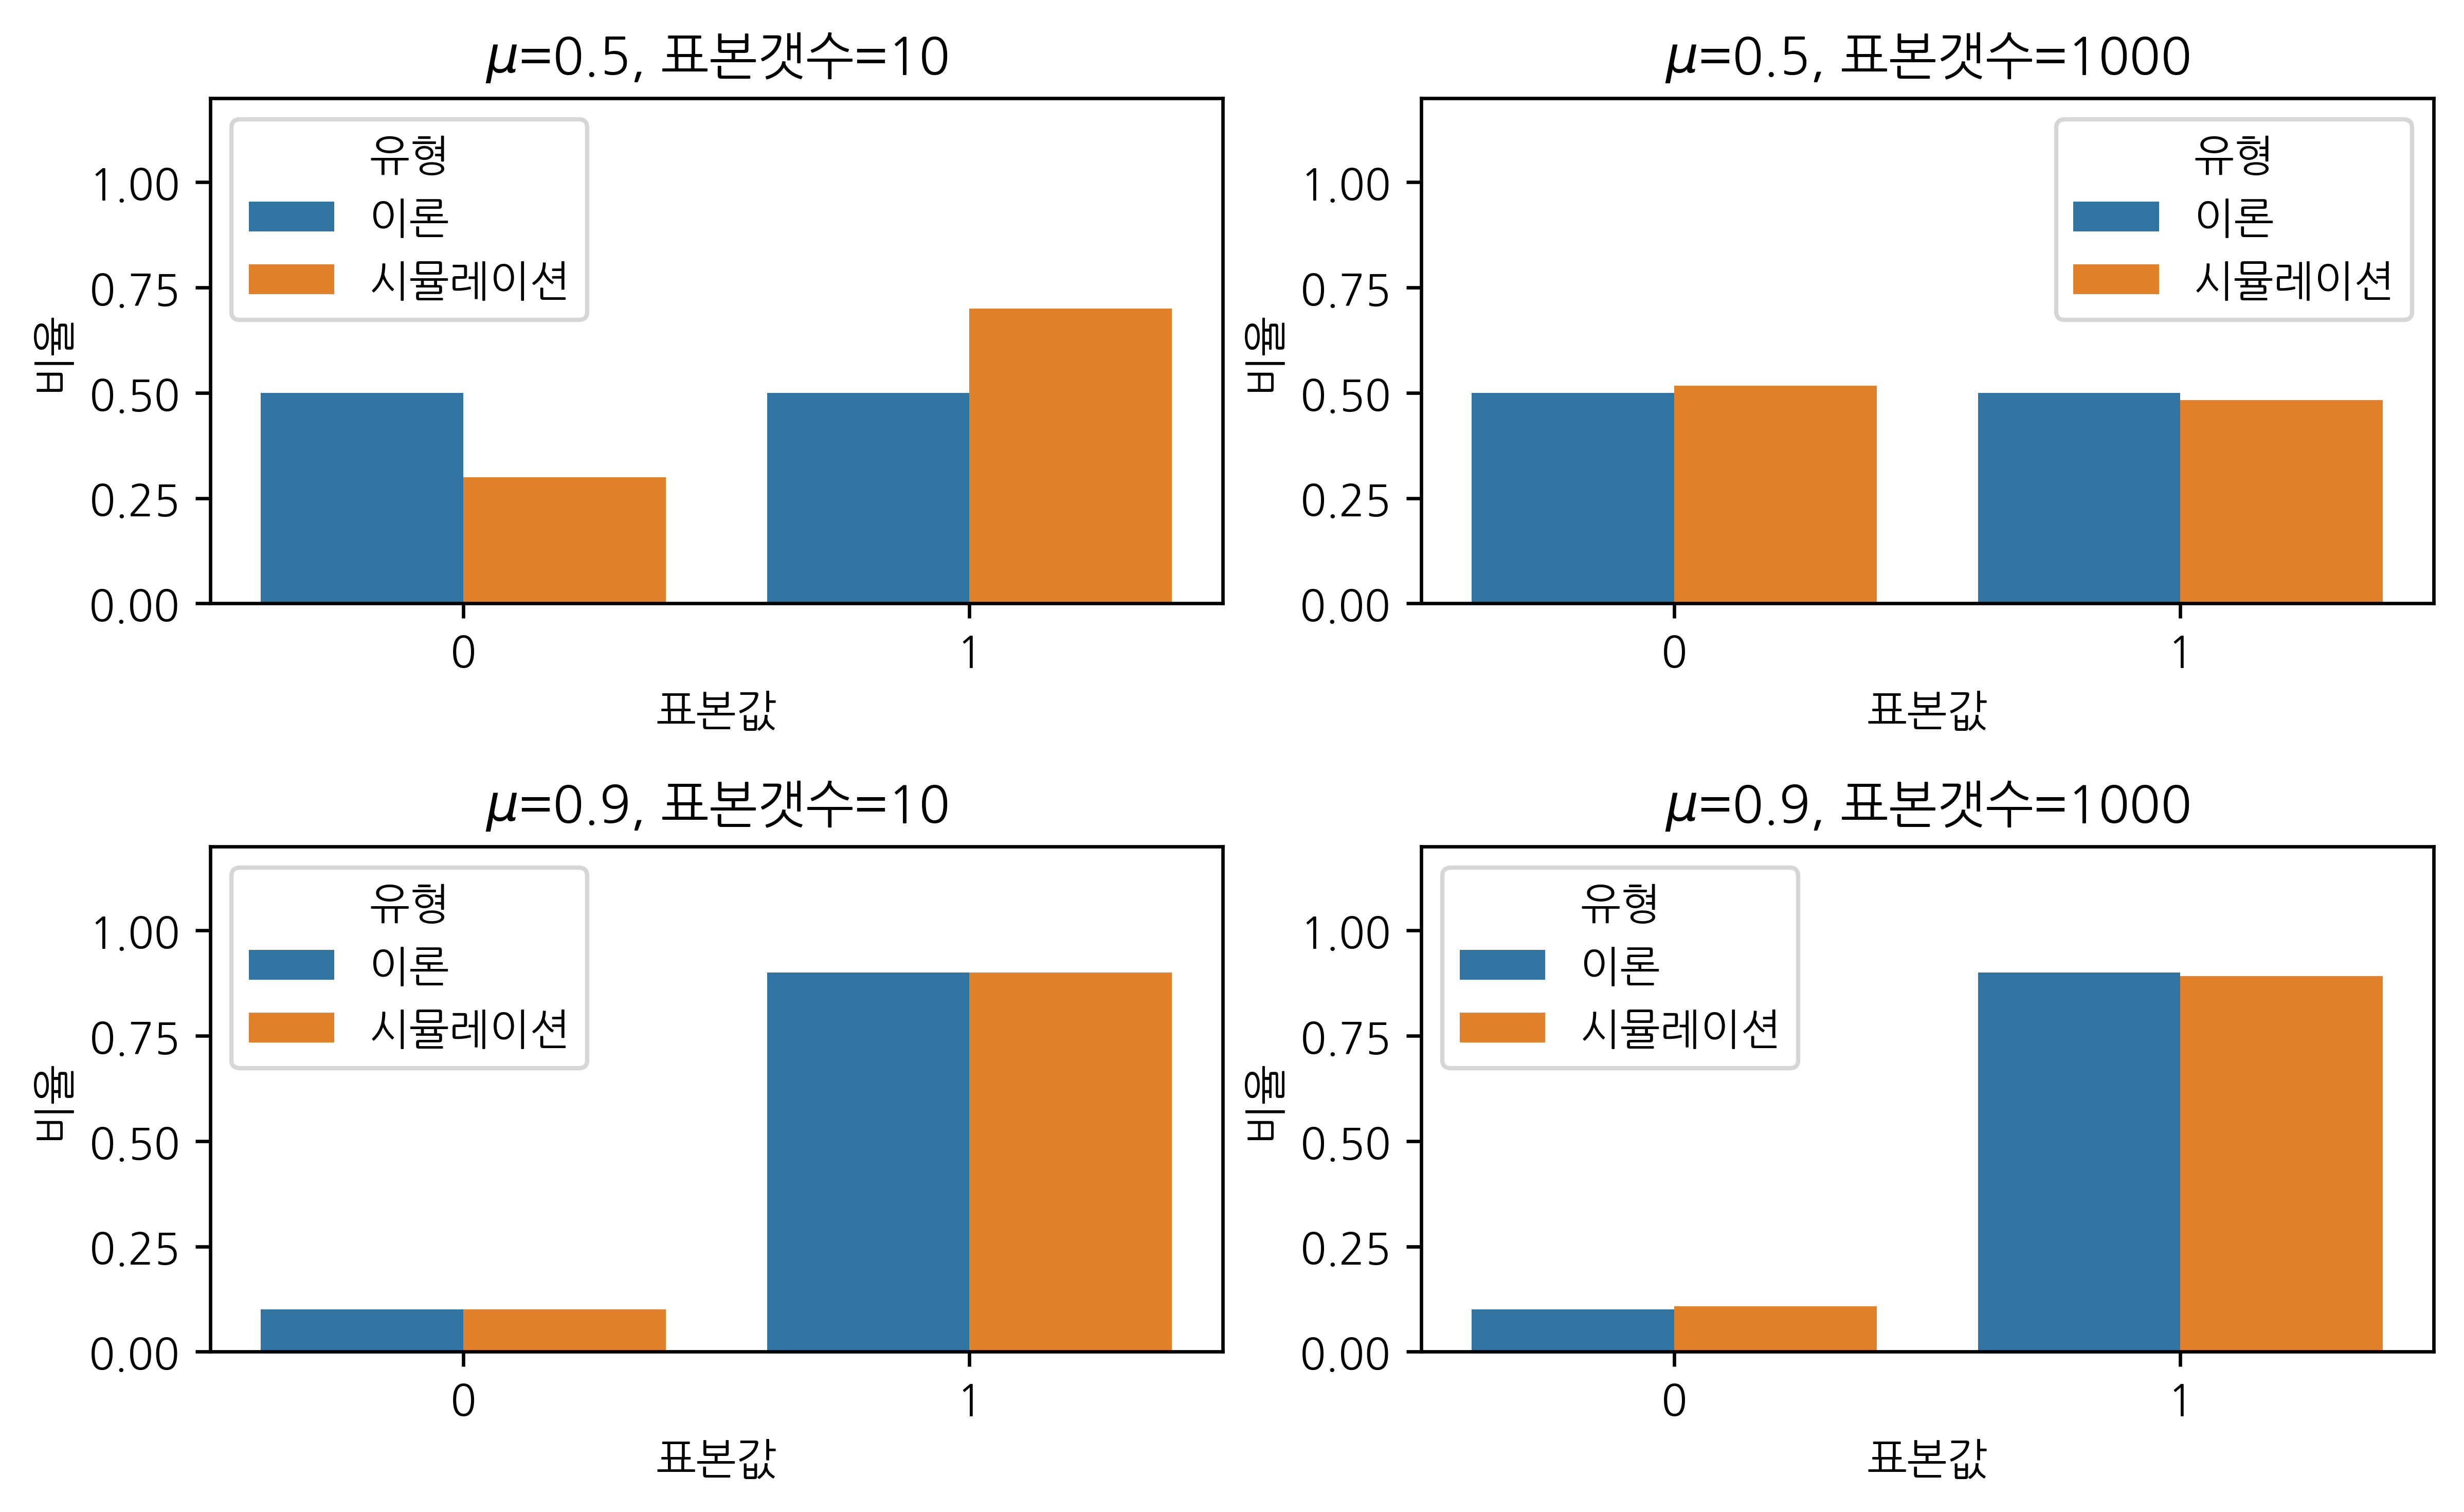

In [45]:
def plot_bernoulli(mu, M):
    rv = sp.stats.bernoulli(mu)
    x = rv.rvs(M, random_state=0)
    y = np.bincount(x, minlength=2) / float(len(x))
    xx = [0,1]
    df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션":y})
    df.index = [0, 1]
    df2 = df.stack().reset_index()
    df2.columns = ["표본값", "유형", "비율"]
    sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
    plt.title("$\mu$={}, 표본갯수={}".format(mu, M))
    plt.ylim(0, 1.2)
    
plt.subplot(221)
plot_bernoulli(0.5, 10)
plt.subplot(222)
plot_bernoulli(0.5, 1000)
plt.subplot(223)
plot_bernoulli(0.9, 10)
plt.subplot(224)
plot_bernoulli(0.9, 1000)
plt.tight_layout()
plt.show()

이항분포의 확률질량함수

In [48]:
N = 10
mu = 0.9
rv = sp.stats.binom(N, mu)

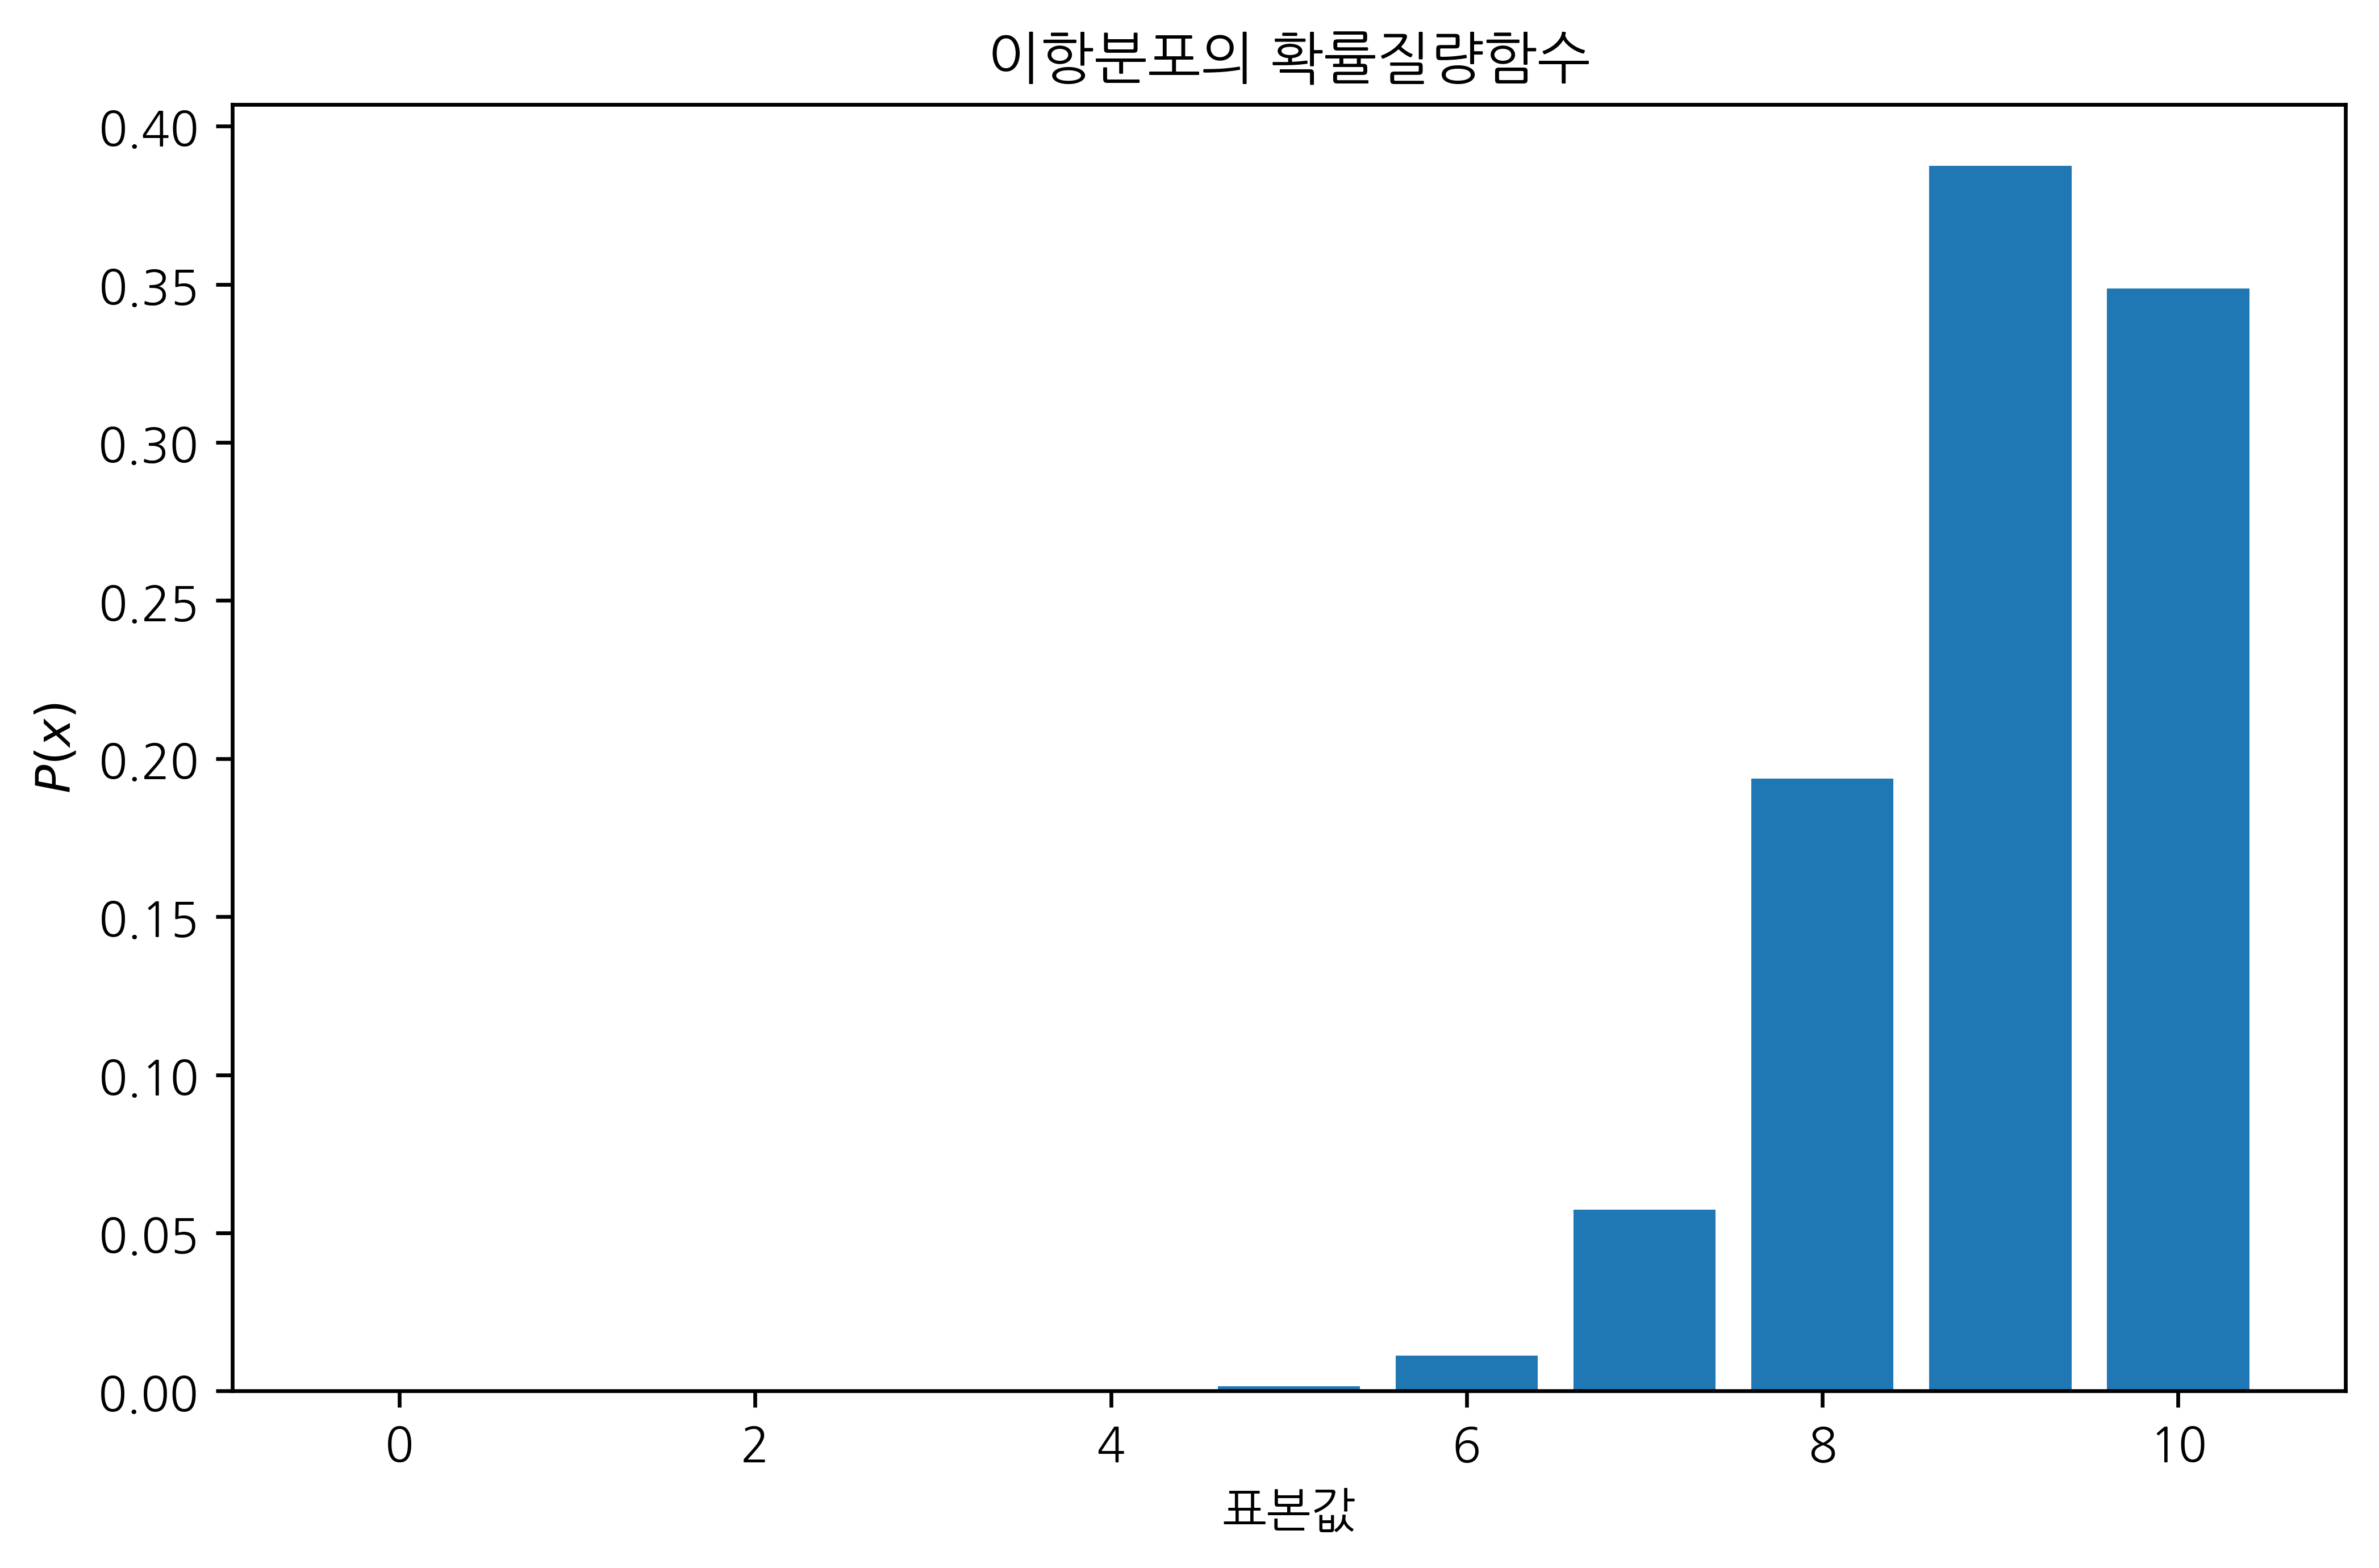

In [49]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()